In [12]:
import numpy as np
import pandas as pd

import sys
sys.path.append("..")
from config import args


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from baseline import *

## Choose metric and data model

In [14]:
loss = 'tau_ols'
model = 'dlvm'

save_plots = False

## Load data

In [18]:
# Multiple imputation results
df_mice = load_results('2019-10-24_exp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice_all = df_mice.copy()
df_mice.head()

results.shape (480, 20)


,model,n,p,prop_miss,seed,method,citcio,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,5,0.1,0,glm,False,1.097757,1.096392,1.097914,0.097757,0.096392,0.097914,mice
1,dlvm,1000,100,0.1,0,glm,False,1.044572,1.043477,1.045678,0.044572,0.043477,0.045678,mice
2,dlvm,5000,5,0.1,0,glm,False,1.071130,1.073666,1.080702,0.071130,0.073666,0.080702,mice
3,dlvm,5000,100,0.1,0,glm,False,1.085659,1.075437,1.077248,0.085659,0.075437,0.077248,mice
4,dlvm,1000,5,0.3,0,glm,False,1.089423,1.089637,1.090258,0.089423,0.089637,0.090258,mice


In [19]:
df = load_results('exp_29.1_10_small.csv_temp')
df['num_samples_zmul']=200

df_ = load_results('exp_04.1_11_small.csv_temp')
df_ = df_[list(set(df_.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_['num_samples_zmul']=200
df_ = df_[df.columns]

df_b = load_results('exp_07.1_11_B.csv_temp')
df_b = df_b[list(set(df_b.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_b = df_b[df.columns]

df = pd.concat((df,df_,df_b))

#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


# columns = df.columns.tolist()
# columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

#tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt = ['model', 'n', 'd','p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps']
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))

df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()
#df.columns.tolist()

results.shape (374, 24)
results.shape (534, 27)
results.shape (150, 28)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,num_samples_zmul,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,200,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,200,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,200,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,200,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,200,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


In [20]:
df_all = df.copy()

In [37]:
#df_all.nunique()

In [38]:
#best_params, df_best = get_best_params(df, loss = loss)

In [21]:
df = df_all.loc[df_all['model']==model]
df_mice = df_mice_all.loc[df_mice_all['model']==model]

## Small prior variance

Proportion of missing values: 0
best_params= {'sig_prior': 0.1, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 200, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 0.1, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 50, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 0.1, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 500, 'model': 'dlvm', 'prop_miss': 0.0}
{'citcio': False, 'p': 100, 'method': 'glm', 'n': 1000, 'model': 'dlvm', 'prop_miss': 0.0}
[False, 100, 'glm', 1000, 'dlvm', 0.0]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.0051450160430326 std:  0.010458104140048436
MDC.mi: mean  tau_ols : 0.9991366195420461 std:  0.005731087031144058
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.005338377884293727
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 0.9933592797804868 std:  0.007115731971951044
MDC.mi: mean  tau_ols : 1.002758519658986 std:  0.005233231035064251
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.005338377884293727
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.0072574896222117 std:  0.005757831989904176
MDC.mi: mean  tau_ols : 1.0031176392913836 std:  0.005377303781893791
MF: 

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 0.9974884402306632 std:  0.008107167424306954
MDC.mi: mean  tau_ols : 1.001191786052733 std:  0.008143384187599178
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0739246114837353 std:  0.006015877821238006
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 0.9862970323565134 std:  0.006960568956543551
MDC.mi: mean  tau_ols : 0.9976490785535559 std:  0.007921407997243392
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0739246114837353 std:  0.006015877821238006
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 0.9993257577424405 std:  0.013725917345012701
MDC.mi: mean  tau_ols : 0.9994996059722254 std:  0.008981752482794448
MF

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 0.9918537824985736 std:  0.01010136043191842
MDC.mi: mean  tau_ols : 1.00882633293496 std:  0.011036352087635468
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.004646684335754479
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.0040146619215409 std:  0.0067551698300711525
MDC.mi: mean  tau_ols : 1.0096136271654543 std:  0.005444596491904514
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.004646684335754479
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 0.9880009652075978 std:  0.013888957518069968
MDC.mi: mean  tau_ols : 1.0245309225551926 std:  0.009688903464390069
MF:

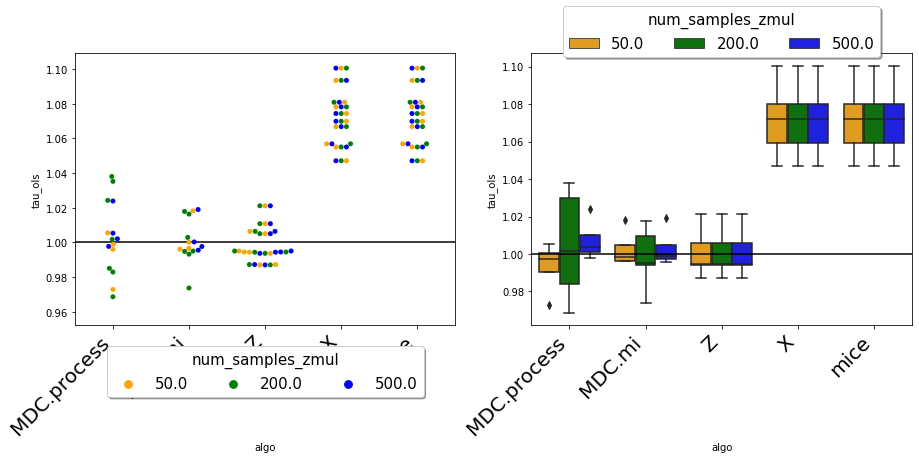

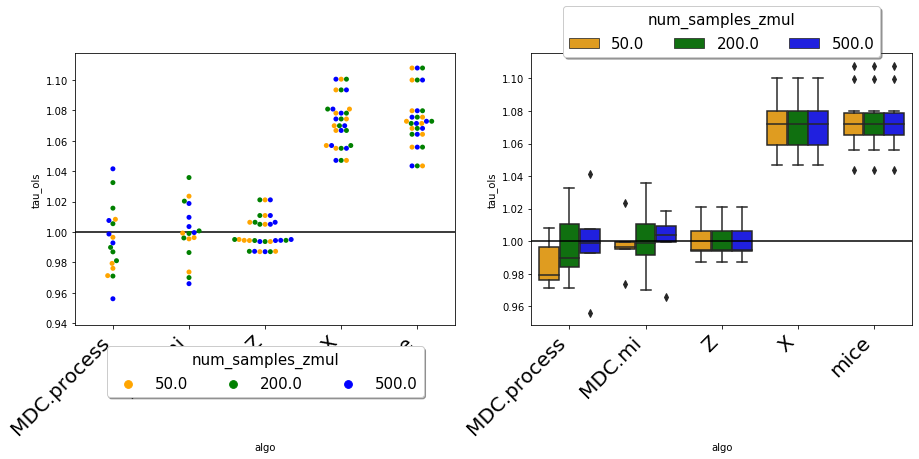

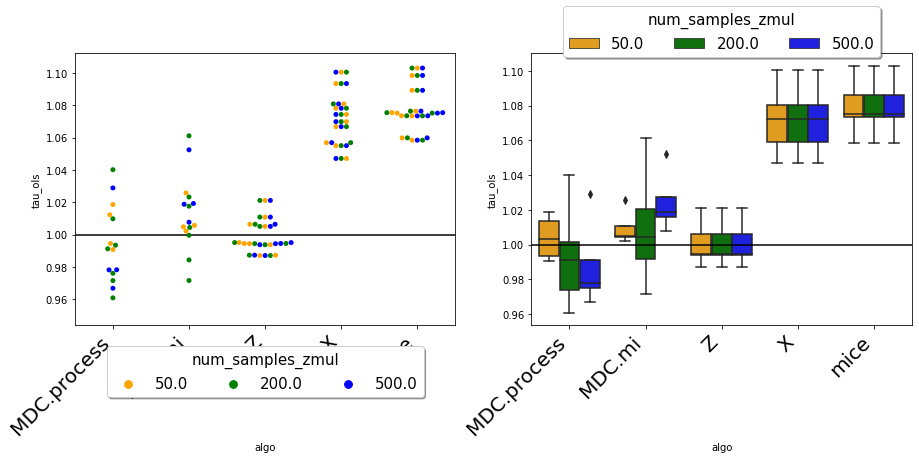

In [22]:
sig_prior = 0.1
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
full_baseline = True
for prop_miss in [0, 0.1, 0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              hue = 'num_samples_zmul', palette=['orange','green','blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          hue = 'num_samples_zmul', palette=['orange','green','blue'])

## Medium prior variance

Proportion of missing values: 0
best_params= {'sig_prior': 1.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 200, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 1.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 50, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 1.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 500, 'model': 'dlvm', 'prop_miss': 0.0}
{'citcio': False, 'p': 100, 'method': 'glm', 'n': 1000, 'model': 'dlvm', 'prop_miss': 0.0}
[False, 100, 'glm', 1000, 'dlvm', 0.0]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.082238545343423 std:  0.01521808193030681
MDC.mi: mean  tau_dr : 1.0654678501525603 std:  0.013955149016475531
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0621925324344343 std:  0.021554437924943947
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.1019594412236358 std:  0.02516166593303842
MDC.mi: mean  tau_dr : 1.0681995571842757 std:  0.024222685428158728
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0621925324344343 std:  0.021554437924943947
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.0193251242023489 std:  0.03322259304329287
MDC.mi: mean  tau_dr : 1.0175179316870309 std:  0.023967150750660537
MF: mean  tau_dr : nan st

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.0918566744609048 std:  0.013431393249876349
MDC.mi: mean  tau_dr : 1.0803120436406526 std:  0.011700095446055638
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0733708233712436 std:  0.015489033277970072
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.0487418214907134 std:  0.012868280899712228
MDC.mi: mean  tau_dr : 1.032419584907616 std:  0.01078061177989056
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0733708233712436 std:  0.015489033277970072
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.015681772697662 std:  0.037645124468990876
MDC.mi: mean  tau_dr : 1.0110553040602246 std:  0.025025039213462903
MF: mean  tau_dr : nan s

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.0295700203352232 std:  0.01576783914820372
MDC.mi: mean  tau_dr : 1.0147256777547502 std:  0.009017169143989088
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0419999351073748 std:  0.051991534282396036
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.085298970930339 std:  0.025696052645171594
MDC.mi: mean  tau_dr : 1.0701530561862025 std:  0.020239887047376195
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0419999351073748 std:  0.051991534282396036
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.0506165247859527 std:  0.0082916629027522
MDC.mi: mean  tau_dr : 1.0325678768325308 std:  0.008604322409546915
MF: mean  tau_dr : nan st

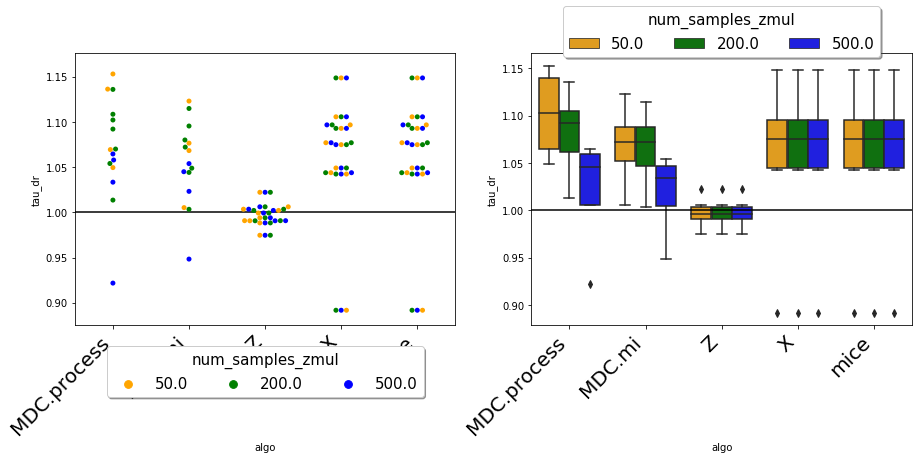

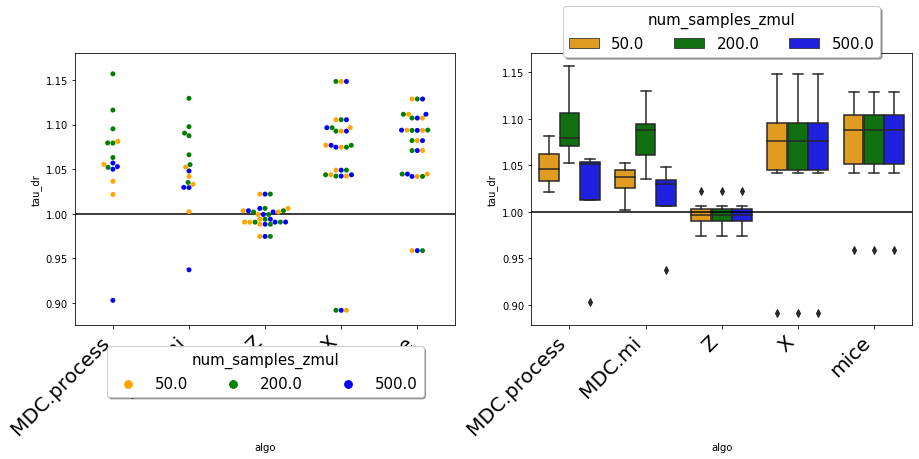

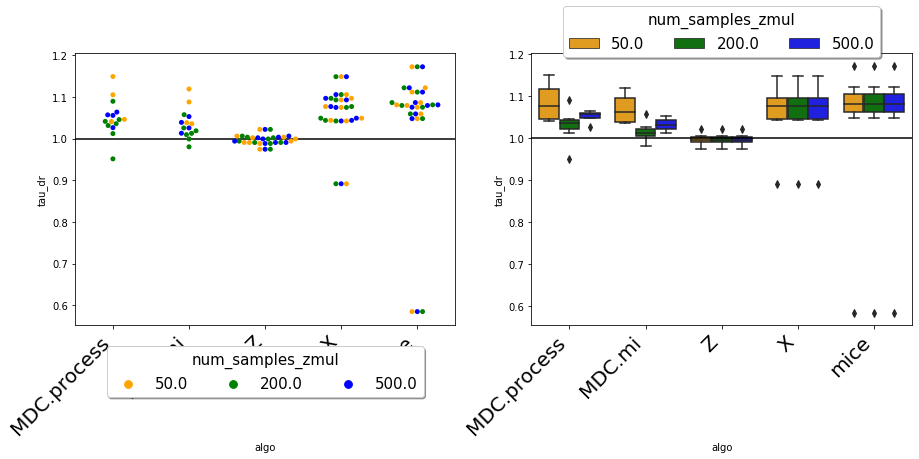

In [30]:
sig_prior = 1
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'num_samples_zmul', palette=['orange','green', 'blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'num_samples_zmul', palette=['orange','green', 'blue'])


## Large prior variance

Proportion of missing values: 0
best_params= {'sig_prior': 10.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 200, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 10.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 50, 'model': 'dlvm', 'prop_miss': 0.0}
best_params= {'sig_prior': 10.0, 'citcio': False, 'n_epochs': 10, 'd_miwae': 3, 'p': 100, 'method': 'glm', 'd': 3, 'n': 1000, 'add_wy': False, 'num_samples_zmul': 500, 'model': 'dlvm', 'prop_miss': 0.0}
{'citcio': False, 'p': 100, 'method': 'glm', 'n': 1000, 'model': 'dlvm', 'prop_miss': 0.0}
[False, 100, 'glm', 1000, 'dlvm', 0.0]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.0899307250141046 std:  0.01044732285762105
MDC.mi: mean  tau_dr : 1.085975369567991 std:  0.006917926142577208
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0621925324344343 std:  0.021554437924943947
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.0764567781183965 std:  0.02044427843762009
MDC.mi: mean  tau_dr : 1.0777472677706579 std:  0.014546288331638823
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0621925324344343 std:  0.021554437924943947
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.0736486029021242 std:  0.011468316410037852
MDC.mi: mean  tau_dr : 1.0763524965468647 std:  0.013344456967356505
MF: mean  tau_dr : nan s

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.0945100364921698 std:  0.009994969735403923
MDC.mi: mean  tau_dr : 1.0934468347225723 std:  0.01013917440907639
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0733708233712436 std:  0.015489033277970072
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.070275159147234 std:  0.009376283339251662
MDC.mi: mean  tau_dr : 1.0684395116071719 std:  0.008877890734533175
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0733708233712436 std:  0.015489033277970072
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.109947315866226 std:  0.018152641293137362
MDC.mi: mean  tau_dr : 1.1081811280447185 std:  0.013041824492756801
MF: mean  tau_dr : nan s

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/plotting/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_dr : 1.0930389976322599 std:  0.007247911986869078
MDC.mi: mean  tau_dr : 1.084883058497412 std:  0.006637429625105877
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0419999351073748 std:  0.051991534282396036
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 50
MDC.process: mean  tau_dr : 1.0931774635757214 std:  0.005957129462941403
MDC.mi: mean  tau_dr : 1.084831168996794 std:  0.008376354903701607
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0419999351073748 std:  0.051991534282396036
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0621925318477803 std:  0.02155443787579867
num_samples_zmul : 500
MDC.process: mean  tau_dr : 1.076771969318691 std:  0.02880468071427097
MDC.mi: mean  tau_dr : 1.0756915507443632 std:  0.019804825615687305
MF: mean  tau_dr : nan st

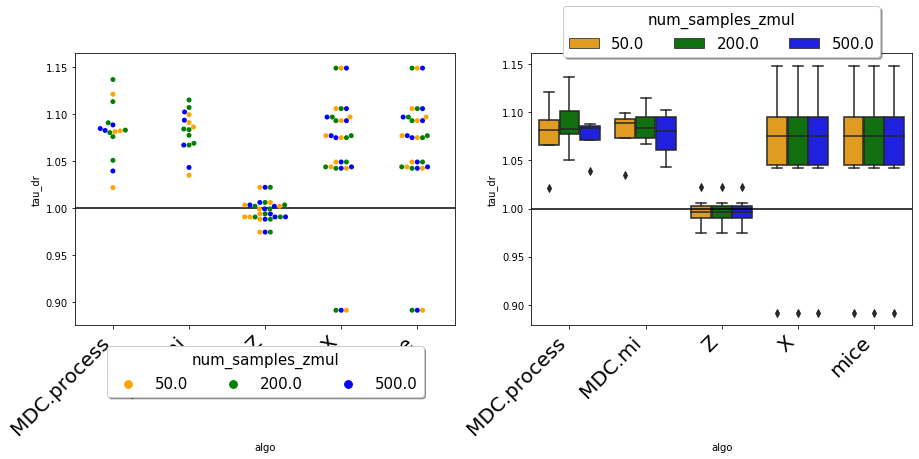

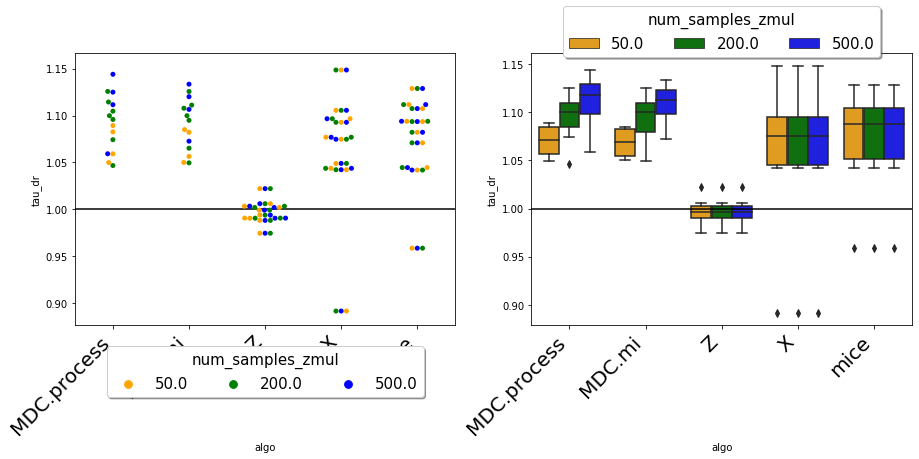

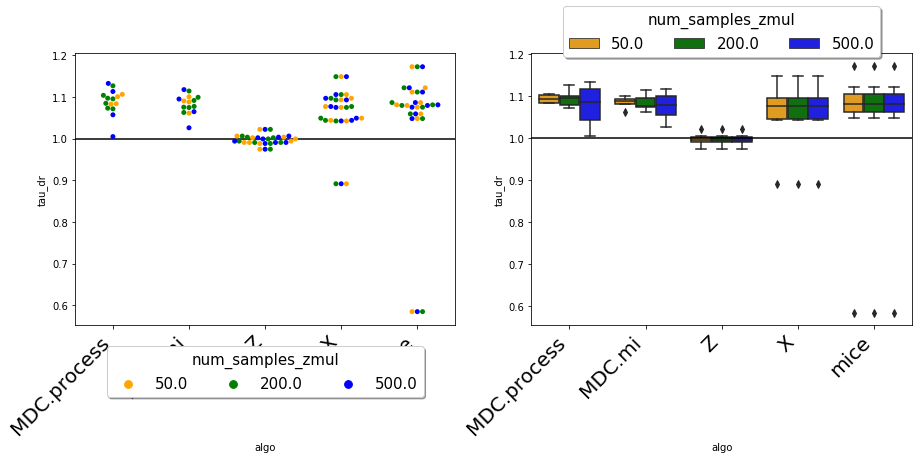

In [29]:
sig_prior = 10
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'num_samples_zmul', palette=['orange','green', 'blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'num_samples_zmul', palette=['orange','green', 'blue'])


### Plots for ICLR v3

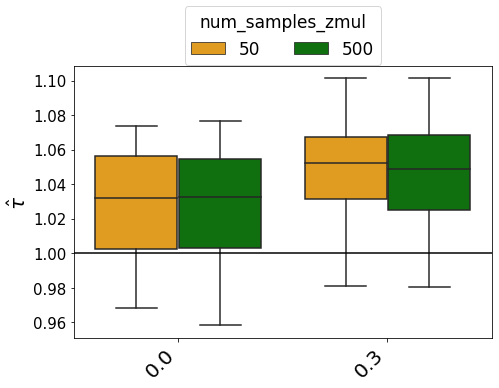

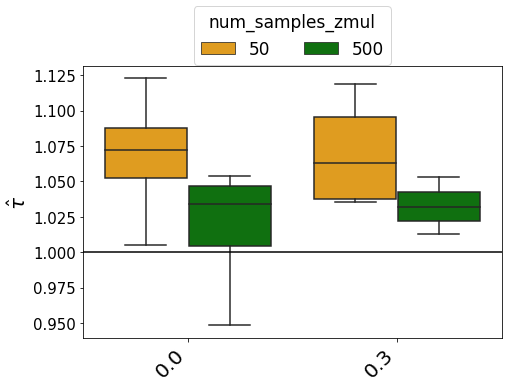

In [28]:
loss = 'tau_dr'
sig_prior = 1
n_epochs = 10
n = 1000

add_wy = False
citcio = False
full_baseline = True
hue = 'num_samples_zmul'
palette=['orange','green','blue']
ground_truth = pd.DataFrame({'tau': [1]})

for p in [5,100]:
    tmp = df.loc[((df['num_samples_zmul']==50) | (df['num_samples_zmul']==500))& ((df['prop_miss']==0) | (df['prop_miss']==0.3)) & (df['seed']<=4) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior)]

    plt.figure(figsize=(7.5,5))
    # ax1 = plt.subplot(1,2,1)
    # ax1 = sns.boxplot(x='prop_miss', y=loss, hue = hue, data=tmp.loc[(tmp['algo']=='MDC.process'),], palette = palette)
    # if (loss == 'tau_dr') | (loss == 'tau_ols') | (loss == 'tau_ols_ps'):
    #     plt.axhline(y=np.mean(ground_truth['tau']), color='k')
    # for tick in ax1.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(20)
    # for tick in ax1.yaxis.get_major_ticks():
    #     tick.label.set_fontsize(15)
    # ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
    # plt.ylabel(r'$\hat{\tau}$', fontsize=20, style='oblique')
    # plt.xlabel('')
    # # if ylim is not None:
    # #     plt.ylim(ylim)
    # lgd1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
    #         fancybox=True, shadow=False, ncol=4, title=hue, title_fontsize = 17, fontsize=17)

    # ax2 = plt.subplot(1,2,2)
    ax2 = sns.boxplot(x='prop_miss', y=loss, hue = hue, data=tmp.loc[(tmp['algo']=='MDC.mi')], palette = palette)
    if (loss == 'tau_dr') | (loss == 'tau_ols') | (loss == 'tau_ols_ps'):
        plt.axhline(y=np.mean(ground_truth['tau']), color='k')
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.ylabel(r'$\hat{\tau}$', fontsize=20, style='oblique')
    plt.xlabel('')
    # if ylim is not None:
    #     plt.ylim(ylim)
    lgd2 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
            fancybox=True, shadow=False, ncol=4, title=hue, title_fontsize = 17, fontsize=17)


    figname = str('../figures/iclr/'+'_p'+ str(p) +'_'+'varyingB.pdf')


    plt.savefig(figname, bbox_inches='tight',format='pdf')
